Author: Muhammad Zeeshan Karamat
        *Research Assistant at SIGMA Lab,Seecs,NUST*





# **KNN ALGORITHM**

k-Nearest Neigbhours Algorithm is a supervised learning algorithm which can be used for both classification and regression problems . 
Knn works on the idea of similarity it assumes that similar things are in close proximity. It makes the prediction by computing the similarity between the input sample and the each training instances

### **LAZY LEARNING ALGORITHM**
It refers to the fact that it doesnot learn a discrimnative function from training data instead it memorizes the data. for example Logistic regression computes its weights during training phase but KNN has no training phase and it works when prediction has to be made which can be computationally expensive as each time we make pridiction it searches for similar neighbors in entire dataset

### **HOW IT WORKS**

1.   Calculate the distance between the input sample and the all training samples.
2.   Make the set of distances with respect to their classes
3.   Sort the distance set 
4.   Choose k number of nearest neigbours from sorted set 
5.   In case of classification, return the mode of k nearest neigbours
6.   In case of regression,return the mean of k nearest neighbours

**Example:**
lets see with an example:

We have customer dataset with two attributes Height and Weight to classify the 
T-shirt size 





In [ ]:
from IPython.display import Image
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving 2.PNG to 2.PNG
Saving 3.PNG to 3.PNG
Saving 4.PNG to 4.PNG


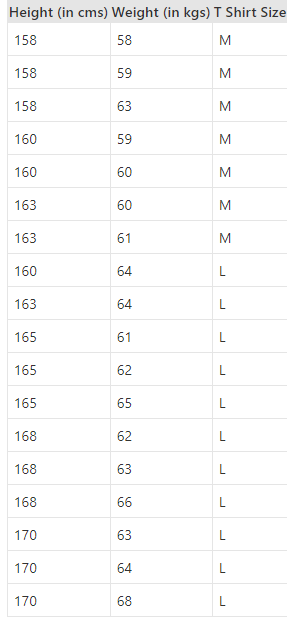

In [ ]:
Image('data.PNG')

Lets say a new customer come with height 161cm and weight 61kg and we have to predict its T shirt size.
Now we have to calculate the distance of new input instance from each data instance using formula:
 

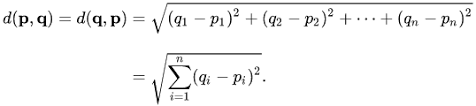

In [ ]:
Image('eulidean.png')

In excel you can calculate the distance using this formula

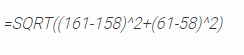

In [ ]:
Image('e.PNG')

Now we will calculate the distance and will rank the nearest 5 neighbours, lets say k=5

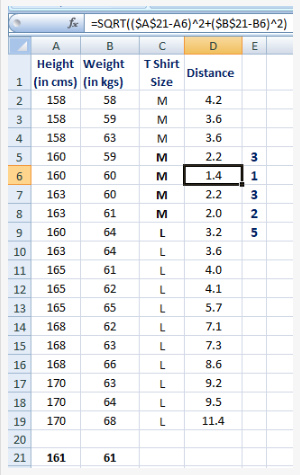

In [ ]:
Image('rank.PNG')

In the graph below, dependent variable (T-shirt size) is displayed in blue and orange color. 'Medium T-shirt size' is in blue color and 'Large T-shirt size' in orange color. New customer information is exhibited in yellow circle. Four blue highlighted data points and one orange highlighted data point are close to yellow circle. so the prediction for the new case is blue highlighted data point which is Medium T-shirt size

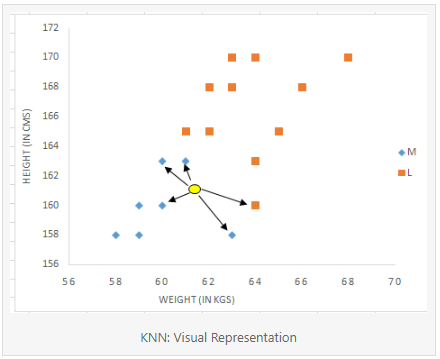

In [ ]:
Image('V.PNG')

### **How to Select value of K**
K refers to number of nearest neighbours. Lets see the influence of k on our algorithm. Lets say you want to buy a house and you ask people for their opinion. These people are the nearest neighbours ***K***. So if you will ask only few people you wont make a good decision similarly if you will ask too many people you will get confused and wont be able to make a good desicion.. So valueof  k shouldnt be too large or too small .As value of k changes the segregation boundary also changes. Following are illustration of how k boundaries change when value of k increases

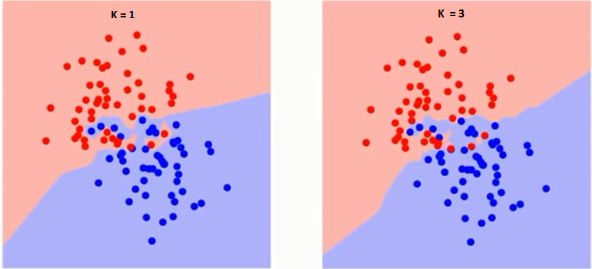

In [ ]:
Image('1.PNG')


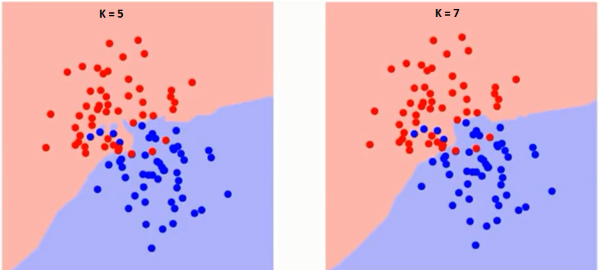

In [ ]:
Image('2.PNG')


We can see that the as the value of k increases the boundaries becomes more smooth. Two parameter that will help us determine the optimal value of k are as follow:

1.   Training Error Rate
2.   Validation Training Rate

Following is training error rate curve 

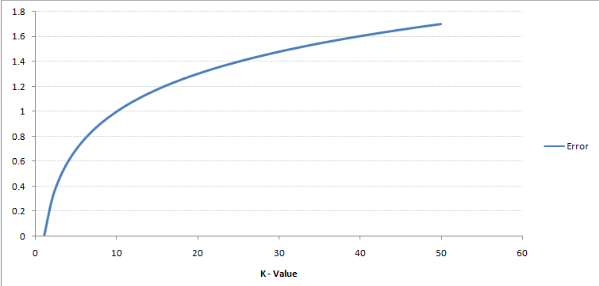

In [ ]:
Image('3.PNG')

As we can see that for k=1 the training error is 0 it means that for k=1. If we had the same validation curve we would have most accurate model for k=1 but validation is curve is as follow.

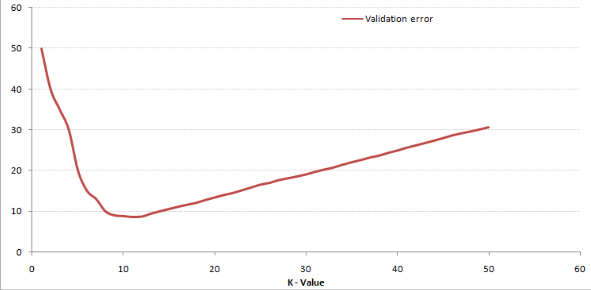

In [ ]:
Image('4.PNG')


it becomes quite clear that for k=1 we are over fitting our model . validation curves decreases with increase in value of k and after minima it increases again. In order to get optimal point we need to segregate the test data and training data and then plot the validation curve and find optimal value of k.

Practically we try different values of k and calculate the accuracy of model. and choose the value of k for which it gives maximum accuracy 

**Value of K should be odd in order to avoid tie**


### **Implemention in python**
Following are steps to implement knn in python
1. **Data handling**: Reading the dataset from csv file and spliting the data into test and train datasets
2. **Similarity:** Measuring the distance of input data from each training data instance
3. **Neighbours:** Locate k most closest neighbours
4. **Response:** Generate a response of predicted class

**1. Data Handling:** 
Our fast step is to read the datasetfile . So we read the file using reader function in csv module 


In [ ]:
!mkdir data


In [ ]:
import os
os.chdir('data')

In [ ]:
import csv
import random
with open('iris.data') as csvfile:
  lines=csv.reader(csvfile)
  for row in lines:
   print(row)

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3.0', '1.4', '0.1', 'Iris-setosa']
['4.3', '3.0', '1.1', '0.1', 'Iris-setosa']
['5.8', '4.0', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7', '1.5', '0.4', 'Iris-setosa']
['4.6', '3.6', '1.0', '0.2', 'Ir

Since we have load data now we have to split data into test and train so we calculate accuracy of our model. 
Standard ratio for splitting is 67/33
we make a function ***loadDataset()*** that opens and reads the csv file and then splits the data into train and test


In [ ]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename) as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])

**2. Similarity:**
Now we have to measure the distance of input sample with all training instances. In order to compute Euclidean distance we make a function 

In [ ]:
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

**3. Neighbours:**
Now we can calculate the distance between the instances that is the measure of similarity . we can use the sorted distances list to find the k most closest neighbours. We define a function that will give us list of k nearest neighbours

In [ ]:
import operator
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

**4. Response:** 
We have k nearest neighbours now we can devise a response based on the votes of these neighbours. It mean that test instance will belong to the class that have more neighbours near the test instance. We will create a function ***getResponse()*** to get the vote of neighbours

In [ ]:
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

**Accuracy**
We need to examine the accuracy of the model to know how good our model is performing. We will evaluate accuracy  by computing the ratio between the correct predictions and total predictions. Lets make accuracy function for this purpose


In [ ]:
 
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

  Now we have all the elements of the algorithm we run this model

In [ ]:
trainingSet=[]
testSet=[]
split = 0.67
loadDataset('iris.data', split, trainingSet, testSet)
	# generate predictions
predictions=[]
k = 5
for x in range(len(testSet)):
	neighbors = getNeighbors(trainingSet, testSet[x], k)
	result = getResponse(neighbors)
	predictions.append(result)
	print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='I

# **Implementation of KNN using sklearn**
Now we will implement KNN algorithm using sci-kit learn library.


**1. Importing libraries:**
First step is to import necessary libraries. we will import two type of libraries
1. Data Exploration libraries
2. Data Visualization libraries

In [ ]:
#Data Exploration Libraries
import pandas as pd
import numpy as np

#Data visualization libraries
import matplotlib.pyplot as plt

**2. Reading Dataset:**
we will use read_csv method from pandas module to read dataset from csv file. After that we will use head() method to display top 5 rows of dataset

In [ ]:
dataset=pd.read_csv('iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


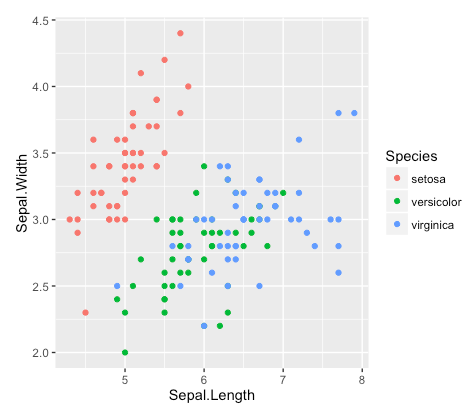

In [ ]:
Image('dataset.PNG')

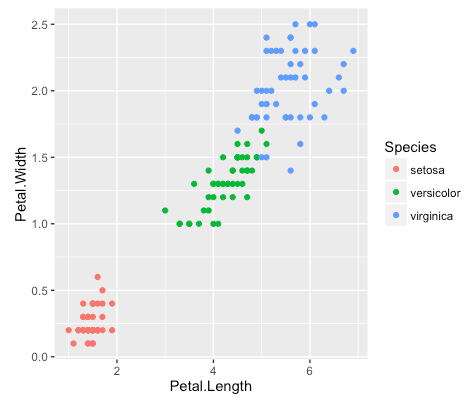

In [ ]:
Image('dataset1.PNG')

**3. Preprocessing of Data:**
In this step we will split the dataset into test and train but before that we will extract the attributes and labels of data and then we will split the data set using sklearn function

In [ ]:
dataset_attributes=dataset.drop(['variety'],axis=1)
classes={"variety":{'Setosa':0,'Versicolor':1,'Virginica':2}}
dataset.replace(classes,inplace=True)
dataset_labels=dataset['variety']


In [ ]:
dataset_attributes.head()


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Train and test Split:**
In order to  avoid overfittting we split the dataset into test and train . it will give us better idea how our algorithm performed. the function below will split datta in 80% train and 20% test data.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(dataset_attributes,dataset_labels,test_size=0.20,random_state=4)

**Create and Train Model:**
in this step we will import our KNeighborsClassifier class from sklearn.neighbors library. we will create its object knn and using its fit() method we will train our model. KNeighborsClassifier has a paramaeter n_neighbor, since we dont the value of k we fill train the moddel for different value of k and evaluate its acurracy. For accuracy we will import accuracy_score method from sklearn.metrics 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:

k_range=range(1,26)
scores={}
scores_list=[]
error=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(Xtrain,ytrain)
  y_pred=knn.predict(Xtest)
  scores[k]=accuracy_score(ytest,y_pred)
  scores_list.append(accuracy_score(ytest,y_pred))
  error.append(np.mean(y_pred!=ytest))

**Accuracy of model for different values of K**

In [ ]:
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

**Accuracy and Error Rate Graph:**
In order to visulatize the graph accuracy and error rate we will use matplotlib function to plot the accuracy and error rate for different values of k

Text(0.5, 1.0, 'Accuracy plot')

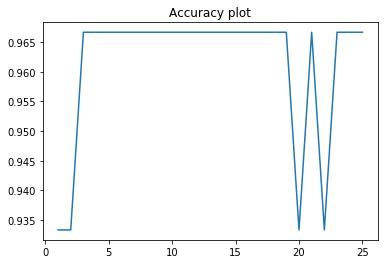

In [ ]:
plt.plot(k_range,scores_list)
plt.title('Accuracy plot')


Text(0.5, 1.0, 'Error Rate')

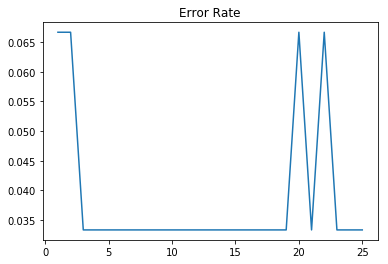

In [ ]:
plt.plot(k_range,error)
plt.title('Error Rate')

**Selecting K by looking at Error rate and accuracy graph:**
If we look at the graphs of accuracy and error rate we can see that error rate is minimum for values of k in between 5 and 15 . Similary the accuracy is maximum for the values of k in range 5 to 15. So we choose the value of k= 5 and train the model for nearest neighbours 5.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(dataset_attributes,dataset_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Our model is ready now lets predict the class of our new input sample

In [ ]:
x_new=[[3,4,5,2]]
y_prd=knn.predict(x_new)
pclass={0:'Setosa',1:'Versicolor',2:'Virginica'}
print(pclass[y_prd[0]])

Versicolor
